## **Removing image backgrounds**

Background removal using pre-trained models typically involves image segmentation techniques that separate the foreground (main subject) from the background.

**Keys Concepts**

1. **Image Segmentation**:
    - Semantic Segmentation: Classifies each pixel in an image into predefined categories (e.g., foreground, background).
    - Instance Segmentation: Differentiates between individual objects within the same class (e.g., multiple people or cars).

2. **Pre-trained Models**:
    - Models like Mask R-CNN, U-Net, and DeepLab: These architectures are commonly used for segmentation tasks. They are pre-trained on large datasets like COCO or Pascal VOC.
    - Transfer Learning: Leveraging weights learned from large datasets allows the model to generalize well to new images, even if the new images have different backgrounds or subjects.

3. **Process Overview**:
    - Input Image: A photo containing the subject you want to keep.
    - Segmentation: The model processes the image, predicting pixel-wise classifications.
    - Mask Generation: The model outputs a mask where foreground pixels are marked (e.g., 1) and background pixels are marked (e.g., 0).
    - Background Removal: The mask is applied to the original image, retaining only the foreground and removing the background.

## **🤗 Background Removal model**: [`RMBG-1.4`](https://huggingface.co/briaai/RMBG-1.4)

`bria-rmbg-1.4` is a background removal model, designed to effectively separate foreground from background in a range of categories and image types. This model has been trained on a carefully selected dataset, which includes: general stock images, e-commerce, gaming, and advertising content, making it suitable for commercial use cases powering enterprise content creation at scale.

In [3]:
from transformers import pipeline

image_path = "https://s4.static.brasilescola.uol.com.br/img/2019/09/panda.jpg"
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)
pillow_mask = pipe(image_path, return_mask = True) # outputs a pillow mask
pillow_image = pipe(image_path) # applies mask on input and returns a pillow image

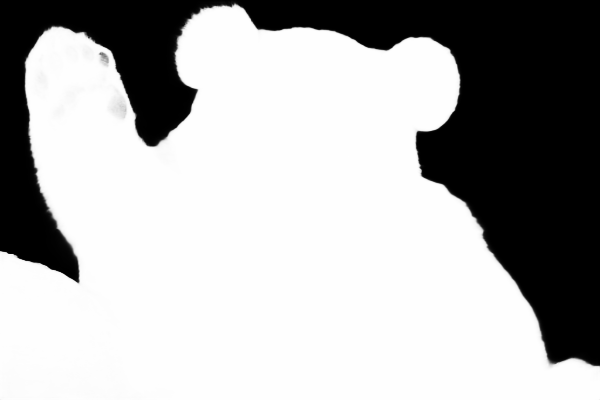

In [4]:
# check pillow mask
pillow_mask

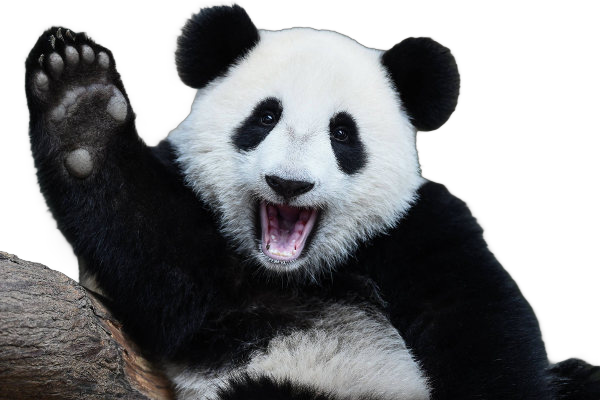

In [5]:
# check pillow image
pillow_image

In [10]:
# Apply the model to all images given a folder and save it in another folder
import os
from PIL import Image
from transformers import pipeline

# Define paths
input_folder = '../dados/images/original-images'
output_folder = '../dados/images/masked-images'

# Load the image segmentation pipeline
pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)

# Iterate over each image in the input folder
for image_name in os.listdir(input_folder):
    # Construct the full path for the image
    image_path = os.path.join(input_folder, image_name)
    
    # Ensure that is image files
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        # Perform segmentation
        pillow_mask = pipe(image_path, return_mask=True)  # Get the mask
        pillow_image = pipe(image_path)  # Apply the mask to the image
        
        # Ensure the image is in RGBA mode for transparency
        if pillow_image.mode != 'RGBA':
            pillow_image = pillow_image.convert('RGBA')
        
        # Ensure the mask is also in RGBA mode
        if pillow_mask.mode != 'RGBA':
            pillow_mask = pillow_mask.convert('RGBA')
        
        # Construct output path
        output_path = os.path.join(output_folder, image_name.replace('.jpg', '.png').replace('.jpeg', '.png').replace('.bmp', '.png').replace('.gif', '.png'))

        # Save the masked image as PNG to preserve transparency
        pillow_image.save(output_path, format='PNG')
        print(f'Saved segmented image with transparency: {output_path}')

Saved segmented image with transparency: ../dados/images/masked-images/make-up.png
Saved segmented image with transparency: ../dados/images/masked-images/television.png
Saved segmented image with transparency: ../dados/images/masked-images/dog-running.png
Saved segmented image with transparency: ../dados/images/masked-images/people.png


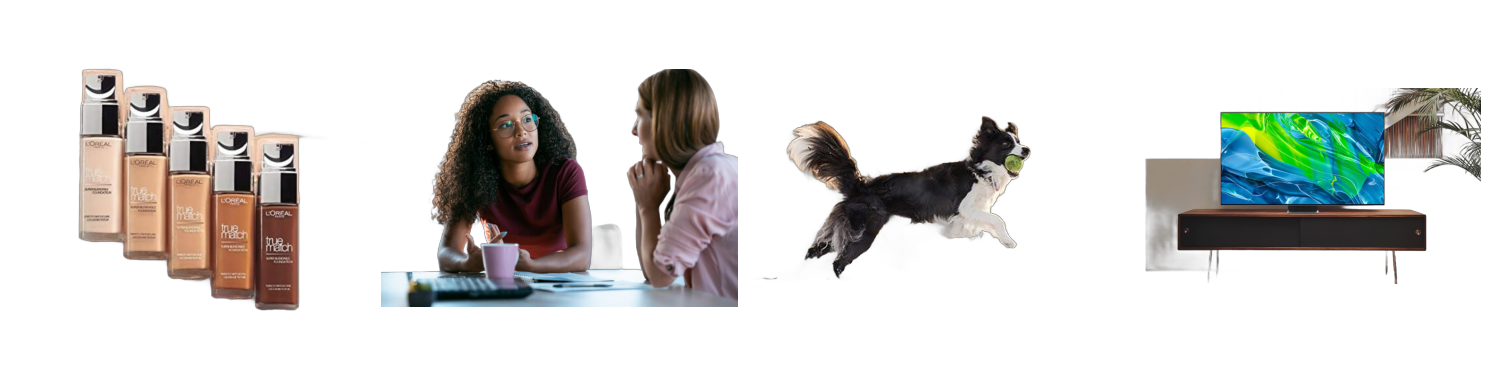

In [11]:
# Check the segmented images
import matplotlib.pyplot as plt

# Create a list to store image paths
image_paths = []

# Iterate over each image in the folder
for image_name in os.listdir(output_folder):
    image_path = os.path.join(output_folder, image_name)
    # Check if the file is an image
    if image_path.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
        image_paths.append(image_path)

# Determine the number of images
num_images = len(image_paths)

# Create subplots
fig, axes = plt.subplots(1, num_images, figsize=(15, 5)) 

# Plot each image in a subplot
for ax, img_path in zip(axes, image_paths):
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide the axes ticks

# Display the plot
plt.tight_layout()
plt.show()

In [13]:
# goal: create an interface using Gradio library where it is possible to upload an image and get it edited
import gradio as gr

# Function to remove background given an image
def remove_background(image):
    pipe = pipeline("image-segmentation", model="briaai/RMBG-1.4", trust_remote_code=True)

    # Create pillow mask
    pillow_mask = pipe(image, return_mask=True)
    # Get pillow image
    pillow_image = pipe(image)

    return pillow_image

In [ ]:
# generates a link for 72 hours
app = gr.Interface(
    fn=remove_background,
    inputs=gr.components.Image(type='pil'),
    outputs=gr.components.Image(type='pil', format='png'),
    title='Remoção de Background de Imagens',
    description='Envie uma imagem e veja o background sendo removido automaticamente. A imagem resultante será no formato PNG.'
)

app.launch(share=True)

This model is available in: https://huggingface.co/spaces/alinastadnik/remove_background 

![Available](../dados/usage_bgrm.jpeg)